# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.¶

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# К признаку стажа добавим признаки: средняя стоимость занятия,
# квалификация репетитора
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [4]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [5]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [6]:
X_st = X.copy().astype(np.float64)

In [7]:
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])



In [8]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    #if i % (iterations / 10) == 0:
    #  print(i, W, err)
  return W

In [9]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

In [10]:
def w_from_lambda(lambda_):
    w=eval_model_reg2(X_st, y,5000, 1e-2, lambda_)
    return w
    

In [23]:
lambdas=np.logspace(-5,1,7,dtype=float)
w_array=np.ndarray(shape=(0,4))

for lambda_ in lambdas:
    w=w_from_lambda(lambda_)
    #print(w)     
    w_array=np.append(w_array,np.array([w]),axis=0)
   
       
    
#print(lambdas)
#print(w_array[:, 0])



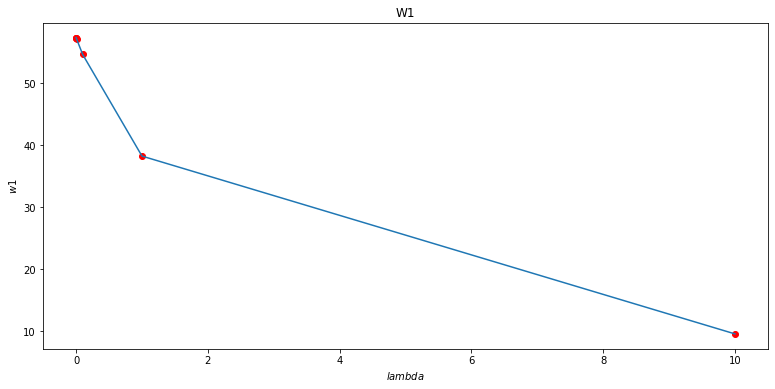

In [24]:
plt.figure(figsize=(13, 6))
plt.title('W1')
plt.ylabel(r'$w1$')
plt.xlabel(r'$lambda$')


plt.scatter(lambdas, w_array[:, 0], c='r')
plt.plot(lambdas, w_array[:, 0])

plt.show()

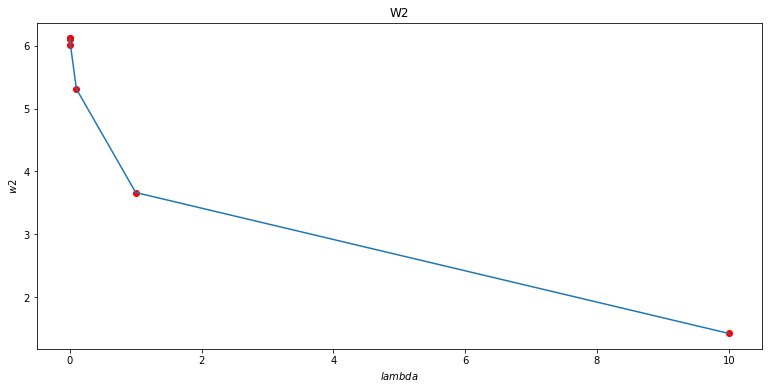

In [25]:
plt.figure(figsize=(13, 6))
plt.title('W2')
plt.ylabel(r'$w2$')
plt.xlabel(r'$lambda$')


plt.scatter(lambdas, w_array[:, 1], c='r')
plt.plot(lambdas, w_array[:, 1])

plt.show()

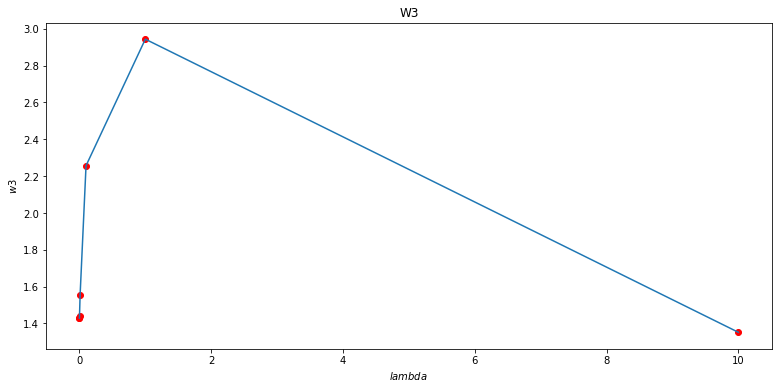

In [26]:
plt.figure(figsize=(13, 6))
plt.title('W3')
plt.ylabel(r'$w3$')
plt.xlabel(r'$lambda$')


plt.scatter(lambdas, w_array[:, 2], c='r')
plt.plot(lambdas, w_array[:, 2])

plt.show()

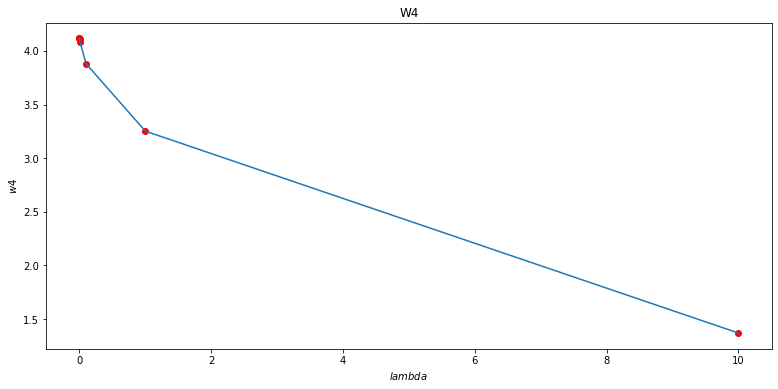

In [27]:
plt.figure(figsize=(13, 6))
plt.title('W4')
plt.ylabel(r'$w4$')
plt.xlabel(r'$lambda$')


plt.scatter(lambdas, w_array[:, 3], c='r')
plt.plot(lambdas, w_array[:, 3])

plt.show()

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нормализация предполагает замену номинальных признаков так, чтобы каждый из них лежал в диапазоне от 0 до 1. 

$$x^{j}_{i} = \frac{x^{j}_{i} - min_{j} (x^{j}_{i})}{max_{j} (x^{j}_{i})-min_{j} (x^{j}_{i})}.$$

Стандартизация же подразумевает такую предобработку данных, после которой каждый признак имеет среднее 0 и дисперсию 1.
$$x^{j}_{i}=\frac{x^{j}_{i} - \mu_{j}}{\sigma_{j}}.$$
$$\mu_{j} = \frac{1}{l}\sum^{l}_{i=1}x^{j}_{i}$$
$$\sigma_{j} = \sqrt{\frac{1}{l}\sum^{l}_{i=1}(x^{j}_{i}-\mu_{j})^{2}}$$

Т.е. одновременно иметь мин в 0(Нормализация) и среднее в 0 (стандартизация) - невозможно (для невырожденных случаев)
т.е. к одному и тому же признаку применить сразу и нормализацию, и стандартизацию бессмысленно.

3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

Используем формулу

$$||w||_{1} = \sum^{d}_{j=1}|w_{j}|.$$

In [28]:
#f(x, W) + (lambda_/2) * np.sum(np.abs(W))
#df/dw1 = d(np.abs(w1) + np.abs(w2) + np.abs(w3)) / dw1 =1+0+0=1
#f'(x, W) + lambda_ * np.sum(1)=f'(x, W) + lambda_

In [29]:
def eval_model_reg3(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_*np.sign(W) ) 
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [30]:
eval_model_reg3(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [57.3976156   5.1079242   2.46011903  4.08691798] 39.981549269279725
1000 [57.3999499   5.76651203  1.85620907  4.03912572] 39.80712300604176
1500 [57.39995     5.99151699  1.60431305  4.06910179] 39.78234087113101
2000 [57.39995     6.07256443  1.50039558  4.09329499] 39.77848915615644
2500 [57.39995     6.10296578  1.45779797  4.10604572] 39.77786776237368
3000 [57.39995     6.11470092  1.44040178  4.11193613] 39.7777660764615
3500 [57.39995    6.1193181  1.4333132  4.1145017] 39.77774934650399
4000 [57.39995     6.12115708  1.43042856  4.11558584] 39.77774658745511
4500 [57.39995     6.12189515  1.42925561  4.11603642] 39.777746131578084
5000 [57.39995     6.12219276  1.42877888  4.11622191] 39.77774605600939


array([57.39995   ,  6.12219276,  1.42877888,  4.11622191])